In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit


In [82]:
df = pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


EDA

In [83]:
df.shape

(13320, 9)

In [84]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


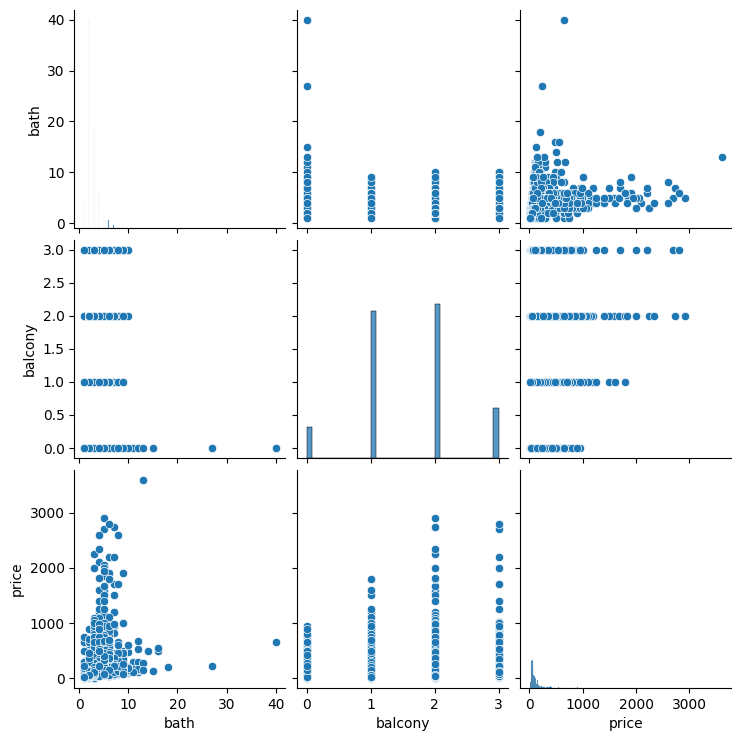

In [86]:
sns.pairplot(df)

In [87]:
for column in df.columns:
  print(column,'\n',df[column].value_counts())
  print('---**---')

area_type 
 Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
---**---
availability 
 Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64
---**---
location 
 Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64
---**---
size 
 2 BHK         5199
3 BH

In [88]:
df.drop(columns=['area_type','society','availability','balcony'],inplace=True)

In [89]:
df.dropna(inplace=True)

**FUNCTION TO TOTAL_SQFT TO FLOAT**

In [90]:
def converter(x):
  sep = x.split('-')
  if len(sep)==2:
    return (float(sep[0])+float(sep[1]))/2
  try:
    return float(x)
  except:
    return None


In [91]:
df.total_sqft =df.total_sqft.apply(converter)


**CREATING NEW COLUMN**

In [92]:
df['price_per_sqft'] = (df['price']*100000)/df['total_sqft']

In [93]:
df.head()

,location,size,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,4250.000000


In [94]:
df['location'] = df['location'].fillna('Whitefield')
df['size'] = df['size'].fillna('2 BHK')
df['bath'] = df['bath'].fillna(2.0)

In [95]:
df['bhk'] = df['size'].str.split().str.get(0).astype('int')
df[df.bhk<20]

,location,size,total_sqft,bath,price,price_per_sqft,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,3699.810606,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4615.384615,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,4305.555556,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,6245.890861,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,4250.000000,2
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,6689.834926,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,11111.111111,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,5258.545136,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,10407.336319,4


In [96]:
df['location'] = df['location'].apply(lambda x:x.strip())

In [97]:
location_count = df.location.value_counts()

In [98]:
location_less_than_10 = location_count[location_count < 11]

In [99]:
df.location = df.location.apply(lambda x:"other" if x in location_less_than_10 else x)

In [100]:
df.location.value_counts()

other                 2881
Whitefield             535
Sarjapur  Road         392
Electronic City        304
Kanakpura Road         266
                      ... 
Nehru Nagar             11
Banjara Layout          11
LB Shastri Nagar        11
Pattandur Agrahara      11
Narayanapura            11
Name: location, Length: 242, dtype: int64

In [101]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13246 non-null  object 
 1   size            13246 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13246 non-null  float64
 4   price           13246 non-null  float64
 5   price_per_sqft  13200 non-null  float64
 6   bhk             13246 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 827.9+ KB


In [102]:
(df.total_sqft/df.bhk).describe()

count    13200.000000
mean       573.847262
std        388.079980
min          0.250000
25%        473.000000
50%        552.000000
75%        625.000000
max      26136.000000
dtype: float64

**REMOVING OUTLIERS**

In [103]:
df = df[((df['total_sqft']/df['bhk'])>=300)]
df.describe()

,total_sqft,bath,price,price_per_sqft,bhk
count,12456.000000,12456.000000,12456.000000,12456.000000,12456.000000
mean,1590.189927,2.562781,111.187960,6308.502826,2.649004
std,1260.404795,1.080275,152.203367,4168.127339,0.976046
min,300.000000,1.000000,9.000000,267.829813,1.000000
25%,1115.000000,2.000000,49.000000,4210.526316,2.000000
50%,1300.000000,2.000000,70.000000,5294.117647,3.000000
75%,1700.000000,3.000000,115.000000,6916.666667,3.000000
max,52272.000000,16.000000,3600.000000,176470.588235,16.000000


In [104]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df = remove_pps_outliers(df)
df.shape

(10241, 7)

In [105]:
df[df.bath>df.bhk +2]

,location,size,total_sqft,bath,price,price_per_sqft,bhk
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,3252.032520,4
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,6428.571429,4
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,6423.034330,3
8411,other,6 BHK,11338.0,9.0,1000.0,8819.897689,6


In [106]:
dummies = pd.get_dummies(df.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**MERGING BOTH DF**

In [107]:
df = pd.concat([df,dummies.drop('other',axis='columns')],axis='columns')
df.head()

,location,size,total_sqft,bath,price,price_per_sqft,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,15017.543860,4,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,11901.840491,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,12533.333333,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,10833.333333,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,11983.805668,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [108]:
df = df.drop('location',axis='columns')


In [109]:
df.head()

,size,total_sqft,bath,price,price_per_sqft,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4 BHK,2850.0,4.0,428.0,15017.543860,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3 BHK,1630.0,3.0,194.0,11901.840491,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3 BHK,1875.0,2.0,235.0,12533.333333,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3 BHK,1200.0,2.0,130.0,10833.333333,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2 BHK,1235.0,2.0,148.0,11983.805668,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [110]:
X = df.drop(columns=['price','size','price_per_sqft'])
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
y = df.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

**splitting data**

In [112]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

**LINREAR REGREESION**

In [113]:
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)
lr_model.score(X_test,y_test)

0.7900425477740893

In [114]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.77907697, 0.7535079 , 0.79892911, 0.80972959, 0.8025454 ])

**DECISION TREE**

In [115]:
DT_model = DecisionTreeRegressor()
lr_model.fit(X_train,y_train)
lr_model.score(X_test,y_test)

0.7900425477740893

In [116]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(DecisionTreeRegressor(), X, y, cv=cv)

array([0.45446712, 0.66751762, 0.42768872, 0.68744806, 0.70158886])

**LASSO REGRESSION**

In [117]:
lasso_model = Lasso()
lr_model.fit(X_train,y_train)
lr_model.score(X_test,y_test)

0.7900425477740893

In [118]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(Lasso(), X, y, cv=cv)

array([0.66394471, 0.62390465, 0.66612256, 0.6608858 , 0.66983172])

In [119]:
def predict_price(sqft,bath,bhk,location):
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_model.predict([x])[0]

In [121]:
predict_price(2850, 5, 4,'1st Block Jayanagar')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


342.38435942445614